In [2]:
# -*- coding: utf-8 -*
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


# 导入小费数据集
df = pd.read_csv('data4/starbucks_store_worldwide.csv')
# 设置中文字体
matplotlib.rcParams['font.family'] = 'FangSong' 



In [3]:
# 1.查看星巴克旗下有多少品牌
all_brand_len = len(df['Brand'].unique())
print(all_brand_len)

# 查看全世界有多少星巴克门店
all_store_len = len(df['Store Number'].unique())
print(all_store_len)



4
25599


In [9]:
# 2.查看全世界一共有多少个国家和地区开设了星巴克门店，显示门店数量排名前10和后10的国家和地区。

all_country_len = len(df['Country'].unique())
all_country = df.groupby(by="Country").count(
)["Store Number"].sort_values(ascending=False)
# 前10
top_country = all_country[:10]
# 后10
end_country = all_country[-10:]
#print(top_country)

Country
US    13608
CN     2734
CA     1468
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
Name: Store Number, dtype: int64


In [ ]:
3.用柱状图绘制排名前10的分布情况

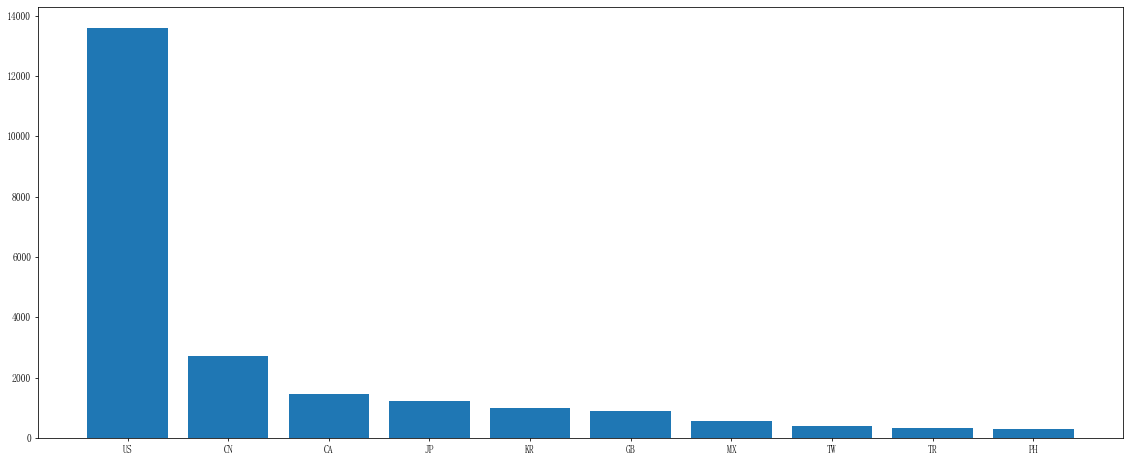

In [10]:
# 3.用柱状图绘制排名前10的分布情况
top_country_x = top_country.index
top_country_y = top_country.values

plt.figure(figsize=(20, 8), dpi=70)
plt.bar(range(len(top_country_x)), top_country_y)
plt.xticks(range(len(top_country_x)), top_country_x)
plt.show()


In [12]:
# 4.显示拥有星巴克门店数量前10的城市
top_city = df.groupby(by="City")["Brand"].count().sort_values(ascending=False)[:10]
#print(top_city)

City
上海市            542
Seoul          243
北京市            234
New York       232
London         216
Toronto        192
Mexico City    180
Chicago        180
Seattle        156
Las Vegas      156
Name: Brand, dtype: int64


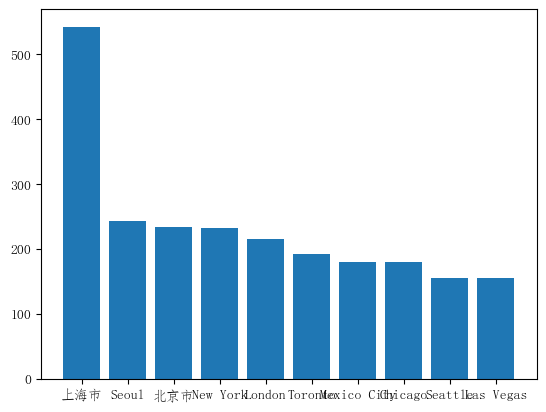

In [14]:
# 5.绘制星巴克门店数前10的城市分布柱状图
top_city_x = top_city.index
top_city_y = top_city.values

plt.bar(range(len(top_city_x)), top_city_y)
plt.xticks(range(len(top_city_x)), top_city_x)
plt.show()


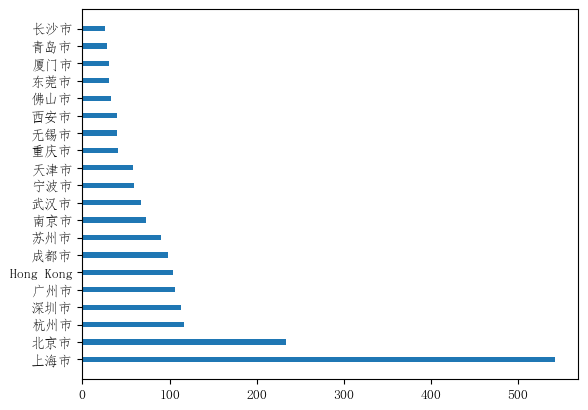

In [15]:
# 6.按照星巴克门店在中国的分布，统计排名前10的城市绘制柱状图
china_data = df[df['Country'] == 'CN']
class_data = china_data.groupby(
    by="City")["Brand"].count().sort_values(ascending=False)[0:20]
class_data_x = class_data.index
class_data_y = class_data.values
# 画图
plt.barh(range(len(class_data_x)), class_data_y, height=0.3)
plt.yticks(range(len(class_data_x)), class_data_x)
plt.show()


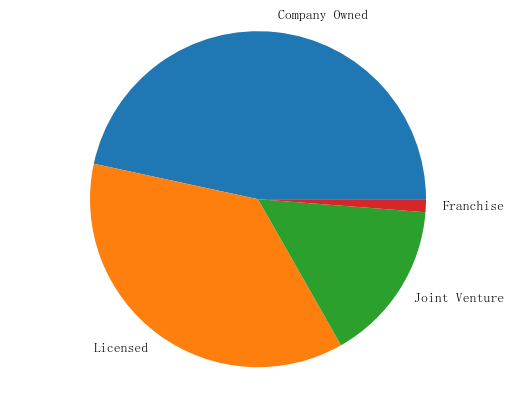

In [16]:
# 7.用饼状图显示星巴克门店的经营方式
operation = df.groupby(by='Ownership Type')[
    "Brand"].count().sort_values(ascending=False)
operation_x = operation.index
operation_y = operation.values
plt.pie(x=operation_y, labels=operation_x)
plt.axis('equal')
plt.show()
